In [16]:
import requests
import json
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
userParam = "profile_id=2308948"
url = f"http://aoe2.net/api/player/matches?game=aoe2de&count=1000&{userParam}"
payload = {}
headers = {
    'Content-Type': 'application/json'
}

responseHistory = requests.request("GET", url, headers=headers, data = payload, verify=False)

history = json.loads(responseHistory.text.encode('utf8'))

<AxesSubplot:>

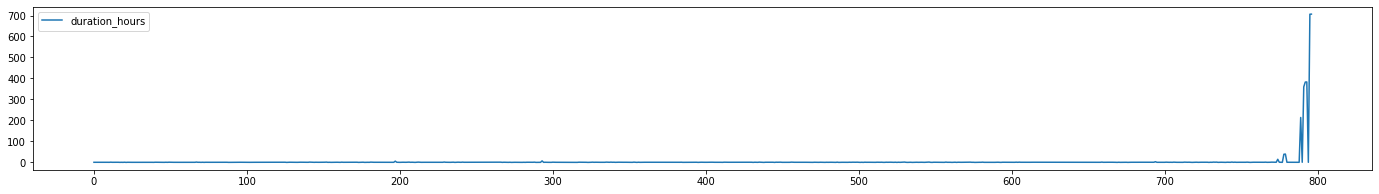

In [39]:
df = pd.json_normalize(history)
df['human_finished'] = df['finished'].apply(lambda x: datetime.fromtimestamp(x))
df['human_started'] = df['started'].apply(lambda x: datetime.fromtimestamp(x))
df['duration_seconds'] = df['finished'] - df['started']
df['duration_minutes'] = df['duration_seconds'] / 60
df['duration_hours'] = df['duration_seconds'] / (60 * 60)
df_new = df[['human_started', 'human_finished','duration_seconds','duration_hours', 'duration_minutes','started','finished']]

df_new.plot(y='duration_hours', use_index=True, figsize=(24,3))

In [40]:
print(f"You played {round(df_new['duration_hours'].sum())} hours in {df_new['duration_hours'].count()} games")

# Select games with duration > 2 hours
df_new[df_new['duration_hours'] > 2]

You played 3287 hours in 797 games


,human_started,human_finished,duration_seconds,duration_hours,duration_minutes,started,finished
197,2020-12-19 00:55:06,2020-12-19 06:47:42,21156,5.876667,352.600000,1608335706,1608356862
293,2020-11-27 19:27:22,2020-11-28 02:38:24,25862,7.183889,431.033333,1606501642,1606527504
694,2020-07-18 09:43:49,2020-07-18 12:57:48,11639,3.233056,193.983333,1595058229,1595069868
774,2020-05-17 20:03:33,2020-05-18 10:47:29,53036,14.732222,883.933333,1589738613,1589791649
778,2020-05-16 19:58:43,2020-05-18 10:47:29,139726,38.812778,2328.766667,1589651923,1589791649
779,2020-05-16 19:11:50,2020-05-18 10:47:29,142539,39.594167,2375.650000,1589649110,1589791649
789,2020-05-09 12:47:20,2020-05-18 10:47:29,770409,214.002500,12840.150000,1589021240,1589791649
791,2020-05-03 10:51:46,2020-05-18 10:47:29,1295743,359.928611,21595.716667,1588495906,1589791649
792,2020-05-02 11:55:51,2020-05-18 10:47:29,1378298,382.860556,22971.633333,1588413351,1589791649
793,2020-05-02 11:22:46,2020-05-18 10:47:29,1380283,383.411944,23004.716667,1588411366,1589791649


In [15]:
df_filtered = df_new[df_new['duration_hours'] < 2]
print(f"You played {round(df_filtered['duration_hours'].sum())} hours in {df_filtered['duration_hours'].count()} games")

df_filtered.describe()

424 hours in 785 games


,duration_seconds,duration_hours,duration_minutes,started,finished
count,785.000000,785.000000,785.000000,7.850000e+02,7.850000e+02
mean,1945.731210,0.540481,32.428854,1.602879e+09,1.602880e+09
std,913.419149,0.253728,15.223652,6.308347e+06,6.308282e+06
min,12.000000,0.003333,0.200000,1.587250e+09,1.587251e+09
25%,1421.000000,0.394722,23.683333,1.598086e+09,1.598088e+09
50%,1886.000000,0.523889,31.433333,1.602879e+09,1.602881e+09
75%,2378.000000,0.660556,39.633333,1.608374e+09,1.608375e+09
max,5801.000000,1.611389,96.683333,1.612381e+09,1.612382e+09


<AxesSubplot:>

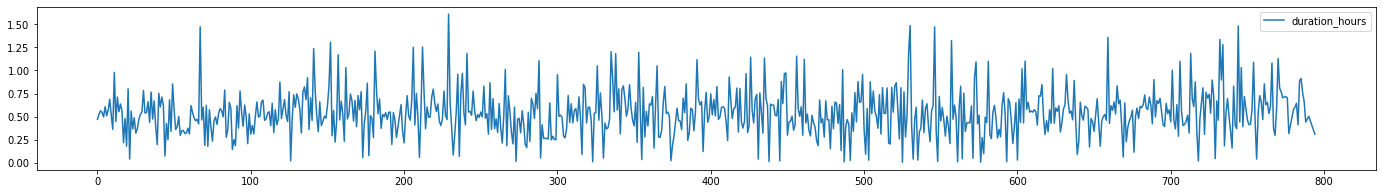

In [38]:
df_filtered.plot(y='duration_hours', use_index=True, figsize=(24,3))